<h1 style = "font-family:'Arial Narrow';font-size:4rem;color:darkblue;">Weather Py</h1>

Python script to visualize the weather of over 500 cities of varying distances from the equator.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
import json
from scipy.stats import linregress

In [2]:
# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Generate the Cities List by Using the "citipy" Library</h2>

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(json.dumps(cities, indent = 3, sort_keys = True))

Number of cities in the list: 585


<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude</h2>

In [4]:
# To fulfill the first requirement, you'll use the OpenWeatherMap API to retrieve weather data from the cities list generated in the starter code. 

# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url +  city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | tadine
Processing Record 3 of Set 1 | vershino-darasunskiy
Processing Record 4 of Set 1 | margate
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | cabo san lucas
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | grand gaube
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | vilyuchinsk
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | talnakh
Processing Record 18 of Set 1 | kununurra
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | j

Processing Record 39 of Set 4 | awjilah
Processing Record 40 of Set 4 | kas
Processing Record 41 of Set 4 | barcelos
Processing Record 42 of Set 4 | callao
Processing Record 43 of Set 4 | cidreira
Processing Record 44 of Set 4 | el granada
Processing Record 45 of Set 4 | kribi
Processing Record 46 of Set 4 | zeya
Processing Record 47 of Set 4 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 48 of Set 4 | tshabong
Processing Record 49 of Set 4 | brookings
Processing Record 0 of Set 5 | chowchilla
Processing Record 1 of Set 5 | east london
Processing Record 2 of Set 5 | udachny
Processing Record 3 of Set 5 | san andres
Processing Record 4 of Set 5 | gadzhiyevo
Processing Record 5 of Set 5 | ketchikan
Processing Record 6 of Set 5 | benton harbor
Processing Record 7 of Set 5 | nemuro
Processing Record 8 of Set 5 | puerto san carlos
City not found. Skipping...
Processing Record 9 of Set 5 | ebon
Processing Record 10 of Set 5 | atherton
Processing Record 11 of Set 5 | pingliang
P

Processing Record 33 of Set 8 | chongwe
Processing Record 34 of Set 8 | bhimunipatnam
Processing Record 35 of Set 8 | tidjikja
Processing Record 36 of Set 8 | tobelo
Processing Record 37 of Set 8 | north tamworth
Processing Record 38 of Set 8 | opuwo
Processing Record 39 of Set 8 | at-bashi
Processing Record 40 of Set 8 | nelson bay
Processing Record 41 of Set 8 | kongsberg
Processing Record 42 of Set 8 | qalat
Processing Record 43 of Set 8 | antofagasta
Processing Record 44 of Set 8 | codrington
Processing Record 45 of Set 8 | madingou
Processing Record 46 of Set 8 | visby
Processing Record 47 of Set 8 | acapulco de juarez
Processing Record 48 of Set 8 | yuzhno-kurilsk
Processing Record 49 of Set 8 | swaffham
Processing Record 0 of Set 9 | franklin
Processing Record 1 of Set 9 | mil'kovo
Processing Record 2 of Set 9 | oriximina
Processing Record 3 of Set 9 | ustyuzhna
Processing Record 4 of Set 9 | huron
Processing Record 5 of Set 9 | carnarvon
Processing Record 6 of Set 9 | northam
P

Processing Record 23 of Set 12 | petauke
Processing Record 24 of Set 12 | tabou
Processing Record 25 of Set 12 | havre
Processing Record 26 of Set 12 | palmer
Processing Record 27 of Set 12 | recodo
Processing Record 28 of Set 12 | menongue
Processing Record 29 of Set 12 | jiangzi
Processing Record 30 of Set 12 | mareeba
Processing Record 31 of Set 12 | mando
Processing Record 32 of Set 12 | tan-tan
Processing Record 33 of Set 12 | kambove
Processing Record 34 of Set 12 | kamaishi
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,32.50,86,75,11.18,RU,1683971149
1,tadine,-21.5500,167.8833,74.34,70,100,20.58,NC,1683971149
2,vershino-darasunskiy,52.3500,115.5167,44.83,78,100,6.11,RU,1683971150
3,margate,51.3813,1.3862,56.89,82,14,13.00,GB,1683971150
4,fortuna,40.5982,-124.1573,52.93,93,100,0.00,US,1683971150


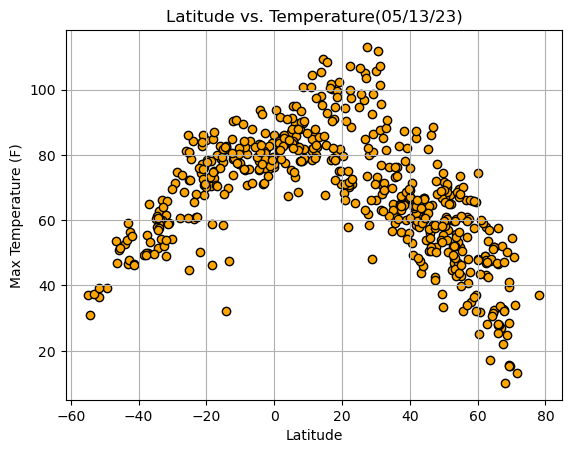

In [8]:
# Next, you'll create a series of scatter plots to showcase the following relationships:
# Latitude vs. Temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],facecolors ="orange", edgecolors ="black")
plt.title("Latitude vs. Temperature(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/Fig1.png")
plt.show()

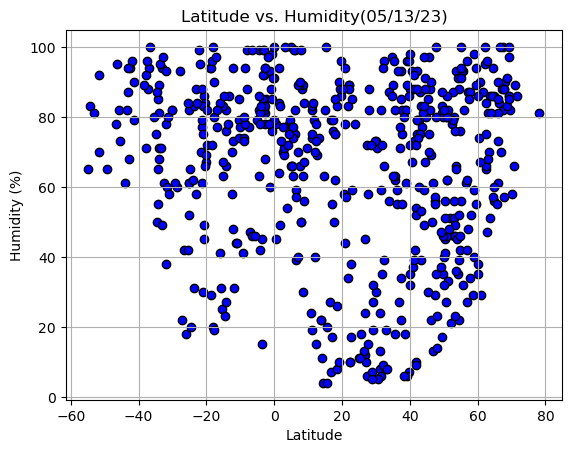

In [9]:
# Latitude vs. Humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],facecolors ="blue", edgecolors ="black")
plt.title("Latitude vs. Humidity(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/Fig2.png")
plt.show()

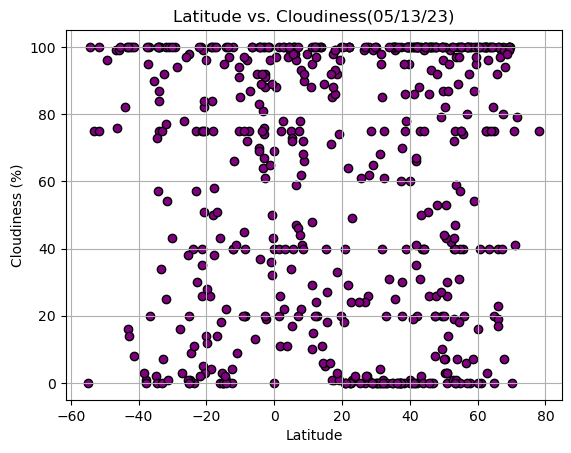

In [10]:
# Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],facecolors ="purple", edgecolors ="black")
plt.title("Latitude vs. Cloudiness(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/Fig3.png")
plt.show()

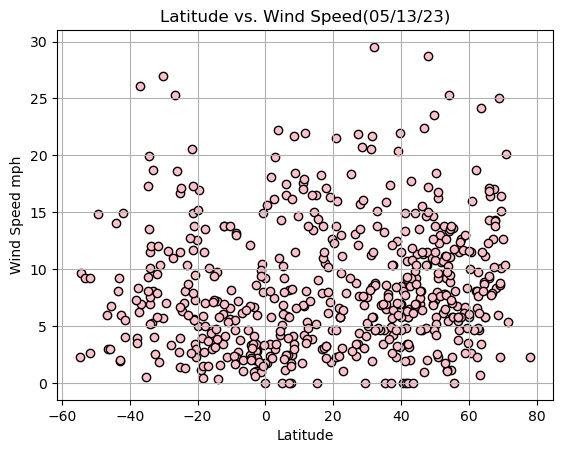

In [11]:
# Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],facecolors ="pink", edgecolors ="black")
plt.title("Latitude vs. Wind Speed(%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.grid()
plt.savefig("../output_data/Fig4.png")
plt.show()

<h2 style = "font-family:'Arial Narrow';font-size:2.5rem;color:Darkgrey;">Requirement 2: Compute Linear Regression for Each Relationship</h2>

In [12]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label="", y_label="", title=""):
    sns.regplot(x=x, y=y)

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,32.50,86,75,11.18,RU,1683971149
2,vershino-darasunskiy,52.3500,115.5167,44.83,78,100,6.11,RU,1683971150
3,margate,51.3813,1.3862,56.89,82,14,13.00,GB,1683971150
4,fortuna,40.5982,-124.1573,52.93,93,100,0.00,US,1683971150
5,cabo san lucas,22.8909,-109.9124,71.06,59,1,1.01,MX,1683970878


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tadine,-21.5500,167.8833,74.34,70,100,20.58,NC,1683971149
7,adamstown,-25.0660,-130.1015,72.41,61,98,16.69,PN,1683971152
8,grand gaube,-20.0064,57.6608,84.60,67,14,5.01,MU,1683971152
11,waitangi,-43.9535,-176.5597,52.65,61,82,14.05,NZ,1683971154
12,ushuaia,-54.8000,-68.3000,37.06,65,0,2.30,AR,1683970990


The r-squared is: 0.6187052682441935


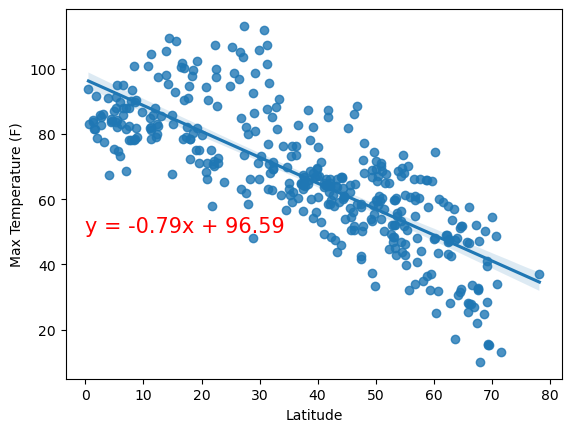

In [16]:
# You should create the following plots:
# Northern Hemisphere: Temperature vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6187052682441935


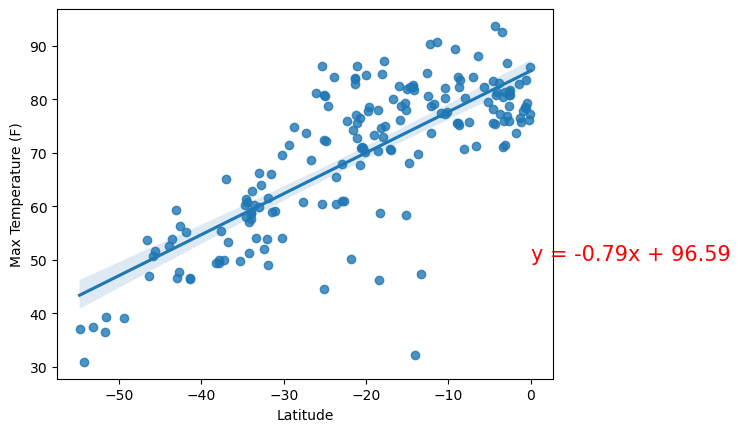

In [17]:
# Southern Hemisphere: Temperature vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

linear_regression_plot(x_values,y_values, "Max Temp", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6187052682441935


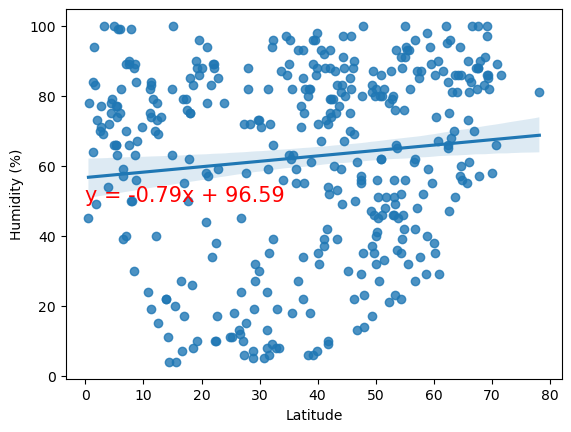

In [18]:
# Northern Hemisphere: Humidity vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6187052682441935


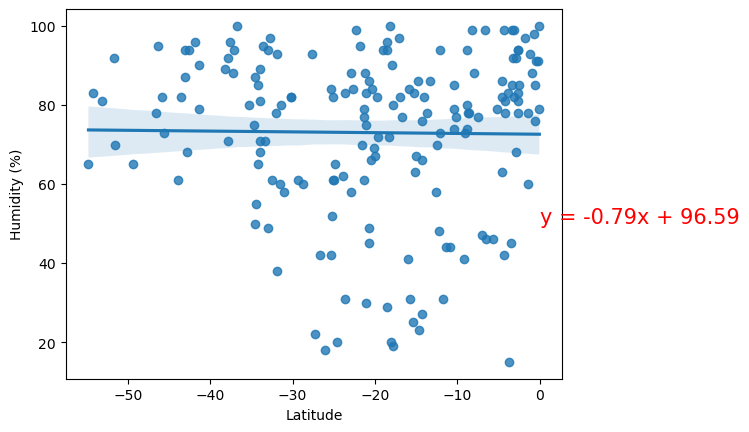

In [19]:
# Southern Hemisphere: Humidity vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

linear_regression_plot(x_values,y_values, "Humidity", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6187052682441935


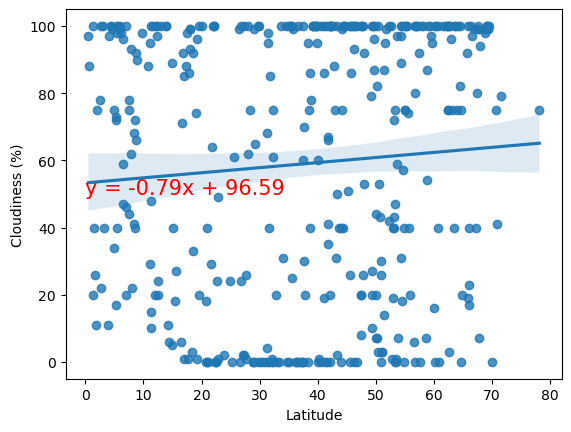

In [20]:
# Northern Hemisphere: Cloudiness vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.6187052682441935


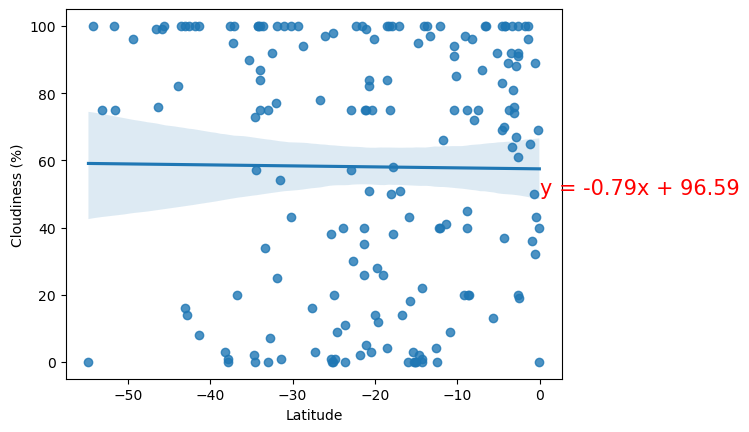

In [21]:
# Southern Hemisphere: Cloudiness vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

linear_regression_plot(x_values,y_values, "Cloudiness", (1,10))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6187052682441935


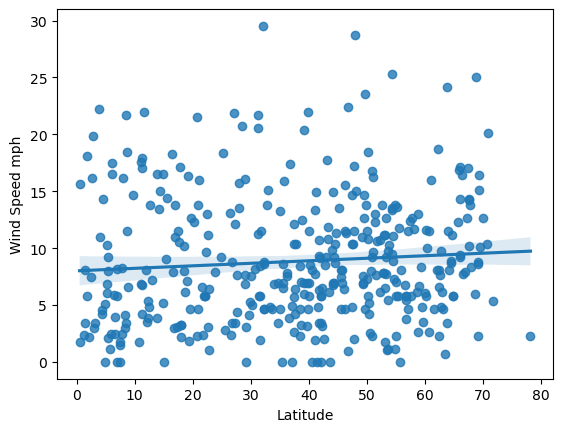

In [22]:
# Northern Hemisphere: Wind Speed vs. Latitude

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

linear_regression_plot(x_values,y_values, "Wind Speed", (40,60))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.6187052682441935


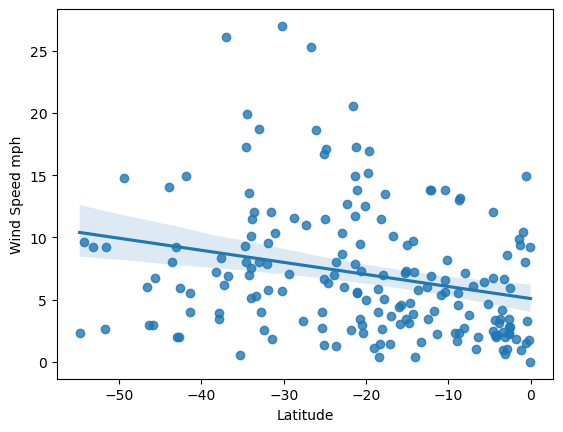

In [23]:
# Southern Hemisphere: Wind Speed vs. Latitude

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

linear_regression_plot(x_values,y_values, "Wind Speed", (70,80))
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
print(f"The r-squared is: {rvalue**2}")
plt.show()